<a href="https://colab.research.google.com/github/MarkStephens060482/MarkStephens060482/blob/main/Spotify's%20Top%20200%20Songs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Spotify's Daily Top 200 charts across the globe for a period of 2017-2020

This report provides visualisation of popularity and attributes of different songs streamed from the Spotify App across the globe.
***

<center>
<h2> The Data </h2>
    
The data used in this report was sourced from https://www.kaggle.com/pepepython/spotify-huge-database-daily-charts-over-3-years. The dataset contains all the songs in Spotify's Daily Top 200 charts in 35 coutries around the world for a period of over 3 years (2017 - 2020).  The data includes 171,000 rows of relevant song attributes, the different countries it was popular in and its popularity as a score.  Each row represents a unique observation set containing many attributes spanning 150 columns. A number of superfluous attributes were dropped from the dataset, leading to the remaining attributes shown in the table below:

| Attribute | Description| Type |
| :-------- | :--------- | :--------------: |
|*Country*| Global and 34 countries where Spotify operates. | String|
|*Popularity*| The popularity score calculated taking into account both the number of days a song stayed in the Top 200 and the position it stayed in every day, weighting more the top positions | Int|
|*URI* | Unique identifier of a song created by Spotify| String|
|*Title* | Name of a song| String|
|*Artist* | Name of the songs' artist | String|
|*Artist_followers* | The number of followers the artist has on Spotify on the 5th of November 2020 | Int|
|*Explicit* | Whether the song is rated as ‘Parental Advisory Explicit Content’ or not | String|
|*Release_date* | Date on which the song was published | Datetime|
|*Danceability* | How suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable|Float|
|*Energy* | It is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy | Float|
|*Loudness* | The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db | Float|
|*Speechiness* | Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks|Float|
|*Acousticness*|A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic|Float|
|*Instrumentalness*|Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness: value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0|Float|
|*Liveness*|Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live|Float|
|*Valence*|A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)|Float|
|*Tempo*|The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration|Float|
|*Durationms*|The duration of the track in milliseconds|Float |
|*Genre_new*|The predominant genre of an artist according to a reclassification of Spotify’s 1200 genres|String
|*Days_since_release*|Number of days passe from the release of the track|Int|

### The Data Set
The complete data set as imported from *csv* file has many variables that were defined for a previous body of work by the individuals who procurred and compiled the dataset using Spotify's API (application programming interface). Many of these attributes were dropped from the dataset, leaving the remaining attributes as outlined above. Also, as the csv file is 170,000 plus rows with possible data type conflicts in any given column, setting *dtype = 'object'* is more process efficient, saving Pandas from testing the data type of every individual value.

In [ ]:
%matplotlib inline
import pandas as pd, seaborn as sns, numpy as np,  matplotlib.pyplot as plt, datetime as dt, scipy.stats as st
from pprint import pprint
import os, csv
import pycountry_convert as pc 
from sklearn.preprocessing import StandardScaler

# Get the current working directory
cwd = os.getcwd()
print("the current working directory is: {0}".format(cwd))

the current working directory is: C:\Users\08632717\Documents\Masters of Data Science Study\Foundations of Computer Science - Python A\Project


In [ ]:
# opening and reading in the csv file to a Pandas dataframe. Loop through and print the headers and column index.

with open('Spotify database.csv',encoding="utf-8") as dataFile:
    raw_df = pd.read_csv(dataFile,low_memory=False)
    
for col_num,col_name in enumerate(raw_df.columns):
    print(f'Column number: {col_num} , column name: {col_name}')

Column number: 0 , column name: Country
Column number: 1 , column name: Uri
Column number: 2 , column name: Popularity
Column number: 3 , column name: Title
Column number: 4 , column name: Artist
Column number: 5 , column name: Album/Single
Column number: 6 , column name: Genre
Column number: 7 , column name: Artist_followers
Column number: 8 , column name: Explicit
Column number: 9 , column name: Album
Column number: 10 , column name: Release_date
Column number: 11 , column name: Track_number
Column number: 12 , column name: Tracks_in_album
Column number: 13 , column name: danceability
Column number: 14 , column name: energy
Column number: 15 , column name: key
Column number: 16 , column name: loudness
Column number: 17 , column name: mode
Column number: 18 , column name: speechiness
Column number: 19 , column name: acoustics
Column number: 20 , column name: instrumentalness
Column number: 21 , column name: liveliness
Column number: 22 , column name: valence
Column number: 23 , column

In [ ]:
# by reviewing column index and column name, a list of columns is removed from the dataframe.
col_remove = [5,6,9,11,12, 15, 17, 25] + [i for i in range(28,151)]
for col in sorted(col_remove, reverse = True):
    raw_df.drop(raw_df.columns[col], axis=1, inplace = True)
df=raw_df.copy()
pd.set_option('display.max_colwidth', 20)
#examining the dataframe using the info() function gives knowledge of datatype and presence of null values for each column
df.info()
# null values are dropped from the dataframe.
print(f'\nThe number of null values dropped {df.isna().sum().sum()}')
df.dropna(inplace = True)
print(f'\nThe number of observation in the dataframe is now {len(df)}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170633 entries, 0 to 170632
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Country             170633 non-null  object 
 1   Uri                 170633 non-null  object 
 2   Popularity          170633 non-null  float64
 3   Title               170633 non-null  object 
 4   Artist              170633 non-null  object 
 5   Artist_followers    170592 non-null  object 
 6   Explicit            170633 non-null  object 
 7   Release_date        170633 non-null  object 
 8   danceability        170633 non-null  object 
 9   energy              170633 non-null  object 
 10  loudness            170633 non-null  object 
 11  speechiness         170633 non-null  object 
 12  acoustics           170633 non-null  object 
 13  instrumentalness    170633 non-null  object 
 14  liveliness          170633 non-null  object 
 15  valence             170633 non-nul

A number of observations with null values are dropped from the datafram. Also, by examining the data type of the columns, it is observed that many of the values were not parsed with the correct data type upon reading the csv file to a pandas dataframe. This is because there are possible values of the wrong type within the 170000 plus rows of observations. To address this issue, firstly dictionaries of column names and their current and desired data types are compiled. 

In [ ]:
#A dictionary is compiled of key value pairs of column names and their current data type respectively. 
col_dtype = df.dtypes.apply(lambda x: x.name).to_dict()
print("\nCurrent data types:\n")
pprint(col_dtype)
#A dictionary is compiled of key value pairs of column names and the correct data type respectively. 

int_type_col = ['Artist_followers','duration_ms','Days_since_release']
for col in int_type_col:
    col_dtype[col] = 'int64'

float_type_col = ['Popularity','acoustics','danceability','energy','loudness','instrumentalness',
                  'speechiness','liveliness','tempo','valence']
for col in float_type_col:
    col_dtype[col] = 'float64'
       
col_dtype['Release_date'] = 'datetime64' 

print("\nCorrect data types:\n")
pprint(col_dtype)


Current data types:

{'Artist': 'object',
 'Artist_followers': 'object',
 'Country': 'object',
 'Days_since_release': 'float64',
 'Explicit': 'object',
 'Genre_new': 'object',
 'Popularity': 'float64',
 'Release_date': 'object',
 'Title': 'object',
 'Uri': 'object',
 'acoustics': 'object',
 'danceability': 'object',
 'duration_ms': 'object',
 'energy': 'object',
 'instrumentalness': 'object',
 'liveliness': 'object',
 'loudness': 'object',
 'speechiness': 'object',
 'tempo': 'object',
 'valence': 'object'}

Correct data types:

{'Artist': 'object',
 'Artist_followers': 'int64',
 'Country': 'object',
 'Days_since_release': 'int64',
 'Explicit': 'object',
 'Genre_new': 'object',
 'Popularity': 'float64',
 'Release_date': 'datetime64',
 'Title': 'object',
 'Uri': 'object',
 'acoustics': 'float64',
 'danceability': 'float64',
 'duration_ms': 'int64',
 'energy': 'float64',
 'instrumentalness': 'float64',
 'liveliness': 'float64',
 'loudness': 'float64',
 'speechiness': 'float64',
 'tempo':

In [ ]:
df.head(3)

,Country,Uri,Popularity,Title,Artist,Artist_followers,Explicit,Release_date,danceability,energy,loudness,speechiness,acoustics,instrumentalness,liveliness,valence,tempo,duration_ms,Genre_new,Days_since_release
0,Global,https://open.spo...,31833.95,adan y eva,Paulo Londra,11427104,FALSE,5/11/2018,0.767,0.709,-4.47,0.336,0.323,0,0.0676,0.72,171.993,258639,hip hop,740.0
1,USA,https://open.spo...,8.00,adan y eva,Paulo Londra,11427104,FALSE,5/11/2018,0.767,0.709,-4.47,0.336,0.323,0,0.0676,0.72,171.993,258639,hip hop,740.0
2,Argentina,https://open.spo...,76924.40,adan y eva,Paulo Londra,11427104,FALSE,5/11/2018,0.767,0.709,-4.47,0.336,0.323,0,0.0676,0.72,171.993,258639,hip hop,740.0


The user defined function, *check_type()* is to test if a value in dataframe will parse to the correct datatype. If it does, then an empty value is return, while if it fails, the value itself is returned. This function is applied to every row for each column in the dataframe. A list of unique row indices of the dataframe where a value of incorrect datatype is located is then compiled. The rows of the dataframe are then dropped according to the list of indices.

In [ ]:
def check_type(value,dtype):
    try:
        if dtype == "int64":
            int(value)
            return np.NaN
        elif dtype == "float64":
            float(value)
            return np.NaN
        elif dtype == "datetime64":
            for fmt in ('%d/%m/%Y', '%Y'):
                try:
                    dt.datetime.strptime(value, fmt)
                except ValueError:
                    pass
            return np.NaN
        elif dtype == "object":
            return np.NAN           
    except ValueError:
        return value
    
remove_index_list=[]
for k,v in col_dtype.items():
    s = df[k].apply(check_type,dtype = v).dropna()
    if not s.empty:
        remove_index_list.extend([i for i in s.index if i not in remove_index_list])
    else:
        pass

df.drop(remove_index_list,axis=0,inplace = True)
df=df.astype(col_dtype)
print(f'''The number of rows dropped from the dataframe: {len(remove_index_list)}
The number of observations in the dataframe: {len(df)}
The data types of each column:\n{df.dtypes}''')

The number of rows dropped from the dataframe: 14
The number of observations in the dataframe: 167356
The data types of each column:
Country                       object
Uri                           object
Popularity                   float64
Title                         object
Artist                        object
Artist_followers               int64
Explicit                      object
Release_date          datetime64[ns]
danceability                 float64
energy                       float64
loudness                     float64
speechiness                  float64
acoustics                    float64
instrumentalness             float64
liveliness                   float64
valence                      float64
tempo                        float64
duration_ms                    int64
Genre_new                     object
Days_since_release             int64
dtype: object


## How does the popularity of tracks vary for different genres in Australia?

The *Popularity* score is a derived quantity based on the number of days in the Spotify's Daily Top 200 Charts and the position the track achieved on that day. The following parallel boxplot produced by Seaborn's *boxplot()* function shows how the *Popularity* score of tracks listed in the charts vary with music genre in Australia. Upon reviewing summary statistics of the *Popularity* score, grouped by *Genre_new*, and noticing a significant spread of values with a positve skew distribution, a $log_{10}$ transform on *Popularity* is performed. Manipulating the data in this manner allows greater clarity in visualising the distributions of the *Popularity* scores for songs across th different genres. Also, the *count()* menthod was used to find the size of each category of data. This is annoted to the plot using *annotate()* function. 

In [ ]:
df_australia = df[df['Country'] == 'Australia'].copy() # filter data by 'Australia'. 
df_australia_popularity_min = df_australia.groupby("Genre_new")['Popularity'].min()
df_australia_popularity_median = df_australia.groupby("Genre_new")['Popularity'].median()
df_australia_popularity_mean = df_australia.groupby("Genre_new")['Popularity'].mean()
df_australia_popularity_max = df_australia.groupby("Genre_new")['Popularity'].max()
df_australia_popularity_count = df_australia.groupby("Genre_new")['Popularity'].count()
df_australia_popularity_summary = pd.DataFrame({'Popularity_min':df_australia_popularity_min,
                                               'Popularity_median':df_australia_popularity_median,
                                                'Popularity_mean':df_australia_popularity_mean,
                                               'Popularity_max':df_australia_popularity_max,
                                               'Popularity_count':df_australia_popularity_count})
df_australia_popularity_summary.head()

,Popularity_min,Popularity_median,Popularity_mean,Popularity_max,Popularity_count
Genre_new,,,,,
boy band,1.6,109.5,4805.473958,135107.00,96
country,0.8,435.2,6525.200000,51313.30,21
dance/electronic,1.6,656.8,8743.438028,107448.35,213
else,4.0,302.0,3071.547159,38371.75,88
funk,34.4,103.7,610.800000,4831.65,13


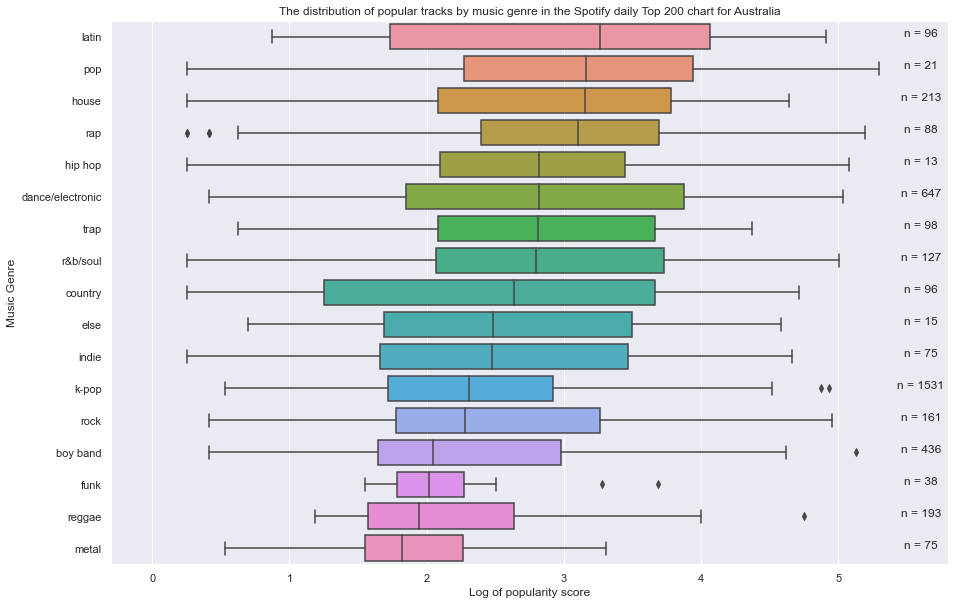

In [ ]:
# Log base 10 transformation of popularity score to address right skew of distribution, with log(x+1) due to 0 values.
df_australia['logPopularity']=np.log10(df_australia.Popularity + 1) 
# sorted in descending order by median for an ordered parallel boxplot
order_by_median = df_australia_popularity_median.sort_values(ascending=False).index

sns.set()
plt.figure(figsize = (15,10))

plot2 = sns.boxplot(x ='logPopularity' ,y='Genre_new',  data = df_australia, order = order_by_median)
plot2.set_title("The distribution of popular tracks by music genre in the Spotify daily Top 200 chart for Australia")
plot2.set_ylabel("Music Genre")
plot2.set_xlabel("Log of popularity score")
plot2.set_xlim(-0.3, 5.8) 

for i in range(len(df_australia_popularity_count)):
    plot2.annotate('n = '+str(df_australia_popularity_count[i]), xy = (5.6,i),horizontalalignment='center')

It can be seen from the graph that the latin music genre has the highest median and upper quatile *Popularity* score than any other music genre in the Daily Top 200 charts for Australia. Where as pop music has the second highest median *Popularity* with the greatest range in values for *Popularity* as well. Alternatively, the metal genre has the lowest median *Popularity*. The country music genre has a significantly large interquartile range with the lowest 25% of values being the lowest out of any other music genre. Finally, the most number of tracks that appeared in Spotify's Daily Top 200 charts in Australia were of the K-pop music genre, followed by dance/electronic, while songs of the hip hop genre were the least. 

## How do the top Artists that dominate the Spotify's Daily Top 200 Charts compare across different Continents?

To answer this, firstly it was necessary to identify the continent that each country was situated in. The continents acted as a suitable grouping category for the different countries listed in the dataframe. The user function *country_to_continent()* was defined to return a continent name given a country name, drawing on the library *pycountry_convert*. This function was firstly applied to a unique *Country* list from the dataframe to catch any values that raise an exception. 

In [ ]:
#Filtering the value 'Global' from the 'Country' attribute.
df_continent = df[df['Country'] !='Global'].copy() 

#User defined function to return a Continent name given a country name.
def country_to_continent(country_name):
    error_countries_list=[]
    try:
        country_code = pc.country_name_to_country_alpha2(country_name, cn_name_format="default")
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except:
        error_countries_list.append(country_name)
    return print(f'countries that raised an exception:\n {error_countries_list}')

country_list = df_continent.Country.unique()
for e in country_list:
    country_to_continent(e)

countries that raised an exception:
 ['UK']


The value 'UK' in the column *Country* of the dataframe raised an except for the user defined function *country_to_continent()*. To address this, the values of 'UK' are replaced with 'United Kingdom'. Then the function *country_to_continent()* is applied to each value of the *Country* column in the dataframe and a *Continent* list is compiled. This list is then inserted into the dataframe.

In [ ]:
#replace given values in a column of the dataframe
df_continent.Country.replace('UK','United Kingdom',inplace=True)
#apply the function to all values in the column
continent = df_continent.Country.apply(country_to_continent)
df_continent.insert(0,'Continent',continent)
df_continent.head(3)

,Continent,Country,Uri,Popularity,Title,Artist,Artist_followers,Explicit,Release_date,danceability,...,loudness,speechiness,acoustics,instrumentalness,liveliness,valence,tempo,duration_ms,Genre_new,Days_since_release
1,North America,USA,https://open.spo...,8.0,adan y eva,Paulo Londra,11427104,FALSE,2018-05-11,0.767,...,-4.47,0.336,0.323,0.0,0.0676,0.72,171.993,258639,hip hop,740
2,South America,Argentina,https://open.spo...,76924.4,adan y eva,Paulo Londra,11427104,FALSE,2018-05-11,0.767,...,-4.47,0.336,0.323,0.0,0.0676,0.72,171.993,258639,hip hop,740
3,Europe,Belgium,https://open.spo...,849.6,adan y eva,Paulo Londra,11427104,FALSE,2018-05-11,0.767,...,-4.47,0.336,0.323,0.0,0.0676,0.72,171.993,258639,hip hop,740


The top 10 Artists represented in the Spotify's Daily Top 200 Charts from each contentient were counted. However the number of songs from these particular artists only consistuted up to 10% of all possible songs appearing in these daily charts. The Pie Graphs below demonstrate the proportion of songs in the Top 200 charts produced by the top 10 artists listen to on Spotify in each continent. The proportion of these songs by the top Artists out of all possible songs listed in the charts is determined from using the *sum()* method and using the division binary operation. This is shown for each Pie graph per continent category. The subplot figure below highlights the main Artists that are most commonly listened to on Spotify across the world.   

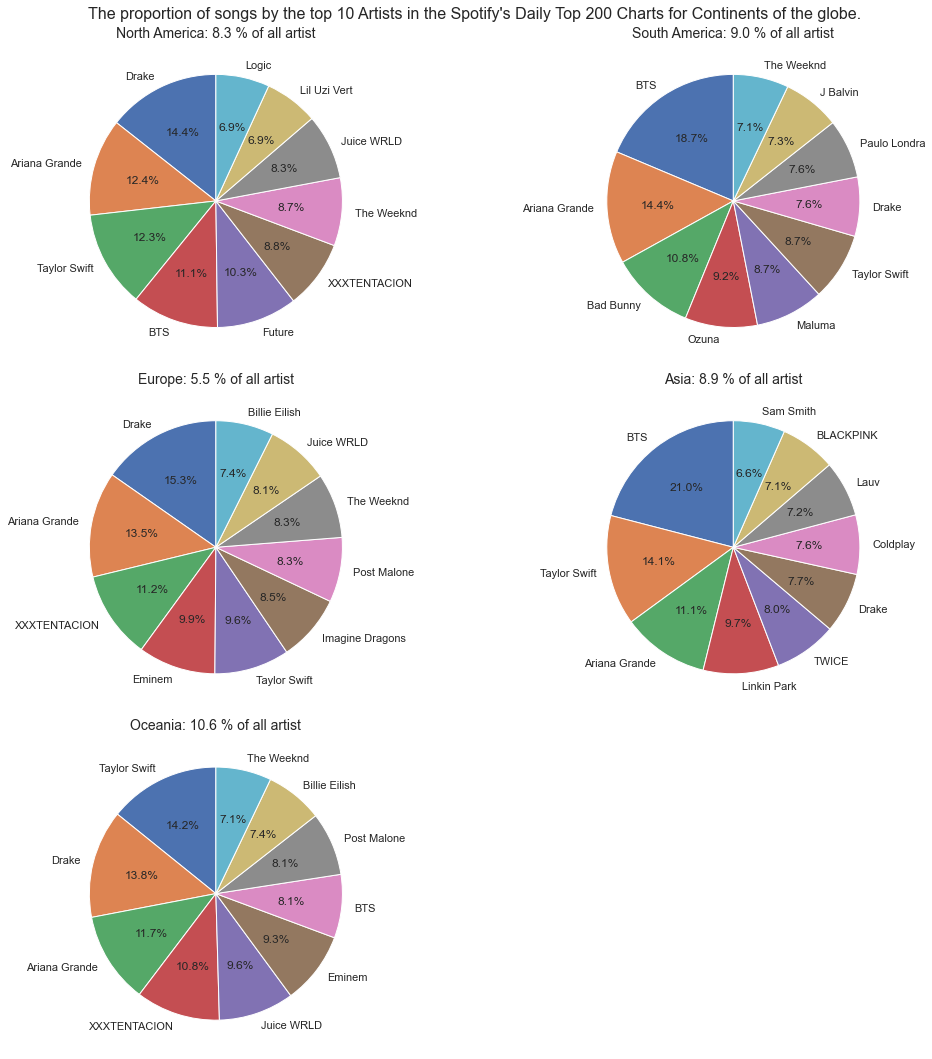

In [ ]:
n = 10
artist_bycontinent = df_continent.groupby("Continent")["Artist"].value_counts()
top_artist_bycontinent = artist_bycontinent.groupby(level=0).head(n)
continent_list = continent.unique().tolist()
artist_prop={}
for cont in continent_list:
#The total sum of songs by the top 10 artists  per continent 
    top_artist_sum = artist_bycontinent.groupby(level=0).head(n)[cont].sum()
# The sum of songs by all possible artists represented in charts per continent.
    all_artist_sum = artist_bycontinent[cont].sum()
# Percentage of Top 10 Artists out of all possible Artists  with songs in the charts.
    artist_prop[cont] = round((top_artist_sum/all_artist_sum)*100,1)

numrow, numcol = 3,2
fig,axis = plt.subplots(numrow,numcol,figsize=(15,15))
fig.suptitle(f"The proportion of songs by the top {n} Artists in the Spotify's Daily Top 200 Charts\
 for Continents of the globe.", fontsize = 16)
counter = 0
while counter < 5:
    try:
        for r in range(numrow):
            for c in range(numcol):
                axis[r,c].set_title(f'{continent_list[counter]}: {artist_prop[continent_list[counter]]} % of all artist',
                                    fontsize = 14)
                axis[r,c].pie(x = top_artist_bycontinent[continent_list[counter]].values,
                              labels = top_artist_bycontinent[continent_list[counter]].index,
                              autopct='%1.1f%%',
                              startangle=90)
                counter +=1
    except:
        break
# delete the 6th axis produced by the subplot function.
fig.delaxes(axis[2,1])
plt.tight_layout()
fig.savefig('plot2.jpeg')

The Pie plots represent the proportions of Artists across the representing countries in 5 different Continents, where countries of the African Continent are not represented in the Spotify music charts. The Artists Drake, Ariana Grande and Taylor Swift  are the most represented appearing in the Top 10 for each of the five Continents. The Artist BTS appears in the top 10 Artists for all Continents except Europe. The Weeknd also appeared in the top 10 Artists for four of the Continents but not Asia. The European continent has the smallest proportion of the top 10 Artists out of all possible artists in the charts, suggesting that the Daily Top 200 charts in Europe host the greatest number of different Artists. 

## How are the characteristics of a song related for different popular music genres?

The Spotify music streaming aplication provides individual song characteristic data. One may hypothesize that music of different genres may exhibit varying tempos, loudness, prevalence of lyrics and convey different moods, vibe and energy. So how do the song characteristic attributes given in the data reflect this?  Initially, the dataframe was filtered by the unique song indentifier attribute, *Uri*, and then only the columns of numerical data type that were related to the particular song characyeristics with selected. Then songs of the top two most frequent music genres where filtered out. The Seaborn *Heatmap* graph was used to visually show the correlation between each of the song characteristics per genre. This is a great example of how Seaborn library provides useful visualisation of a data manipulation such as correlation with a fluid colour scale for the statistic's value range.    

In [ ]:
#filtering by Uri instead of title, due to possibility of different songs with same title.
df_song = df.drop_duplicates(subset=['Uri']).copy()

#Compiling the relevant song attributes that are of a numeric data type
numerical_columns1 = [label for label,content in df_song.items()
                     if pd.api.types.is_numeric_dtype(content) and 
                     (label not in ('Popularity','Artist_followers','Days_since_release'))]
numerical_columns1

['danceability',
 'energy',
 'loudness',
 'speechiness',
 'acoustics',
 'instrumentalness',
 'liveliness',
 'valence',
 'tempo',
 'duration_ms']

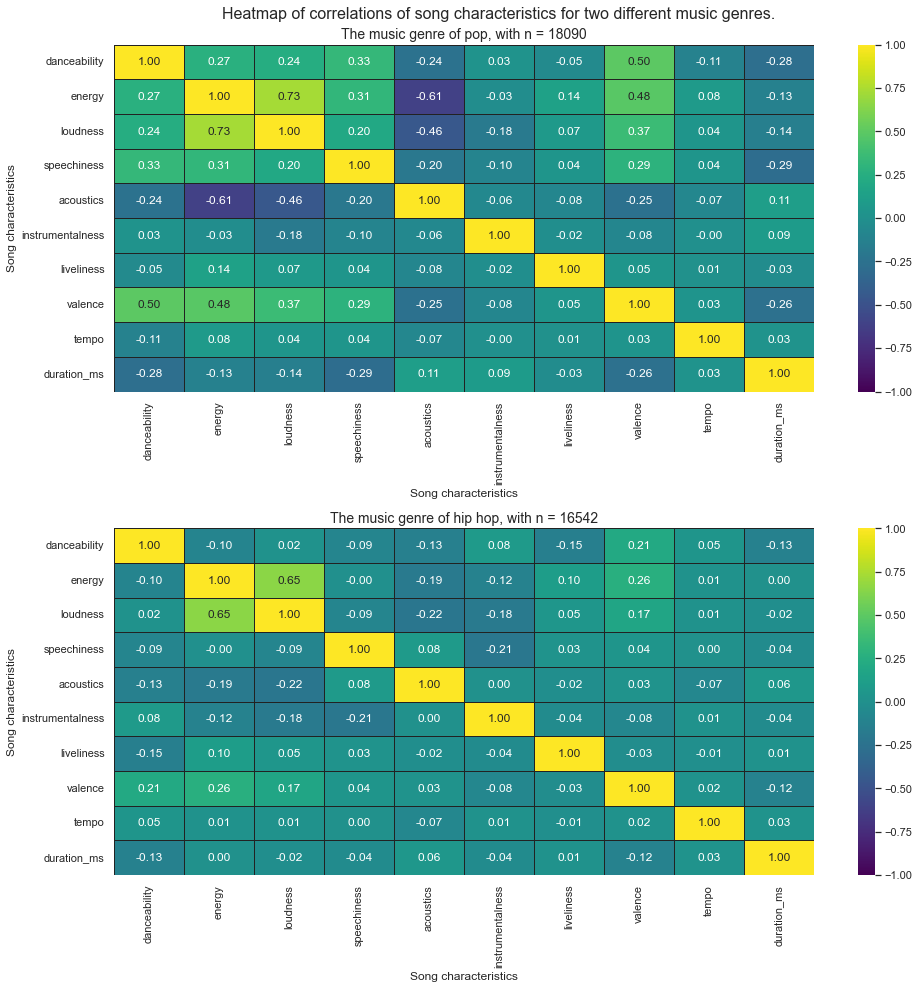

In [ ]:
# Getting the two largest genres of music
popular_genre_list = df_song['Genre_new'].value_counts().nlargest(2).index
#vGetting the correlations between pair of columns and plotting the heatmaps as subplots
fig,ax = plt.subplots(2, 1, figsize=(14,14))
fig.suptitle("Heatmap of correlations of song characteristics for two different music genres.", fontsize = 16)
for count, popular_genre in enumerate(popular_genre_list):
    df_song_genre = df_song.loc[df_song['Genre_new'] == popular_genre, numerical_columns1]
    corr = st.spearmanr(df_song_genre).correlation
    sns.heatmap(corr,
                annot=True,
                fmt='.2f',
                linewidths=.5,
                xticklabels=numerical_columns1,
                yticklabels=numerical_columns1,
                vmax=1.0,
                vmin=-1.0,
                cmap="viridis",
                linecolor="#222",
                ax=ax[count])
    ax[count].set_title(f'The music genre of {popular_genre}, with n = {len(df_song_genre)}',fontsize = 14)
    ax[count].set_ylabel("Song characteristics")
    ax[count].set_xlabel("Song characteristics")
plt.tight_layout()

The Heatmaps for both Pop and Hiphop music genres show the strongest positive correlation between *energy* and *loudness*, suggesting a relationship between these two attributes. For Hiphop, other than the relationship between *energy* and *loudness*, little to no correlation is observed between the other characteristics of the songs in this genre. For the Pop music genre, a song's *valence* is moderately correlated to its *energy* and *danceability* with a postive relationship. The Pop music genre also exhibits a moderate negative relationship between *energy* and *acousticness*, such that as the intensity ad activity of a song increases, the less confident the track is acoustic.  

## Do the seasons of the year affect the mood of the music people listen to?

Do people listen to and enjoy more positive and uplifting music, dancy music and music of higher energy especially during the Summer months of the year? Do they then have a tendancy to listen to more music of opposite characteristics during the cold Winter period? Are there any trends observed overall, regardless of seasonal affects?  To examine this the attribute *Days_since_release* was defined as a datetime object and added to the other datetime attribute *Release_date*. This gave a day during the 3 years period (2017 - 2020) when the song was first listed in the Daily Top 200 charts.This timeseries was split into months and will be a grouping category for the numerical data. As the seasons occur in different months of the year depending on the Hemisphere of the globe, the data was filtered into two groups of representative continents, Europe and North America for the Northern Hemisphere and Oceania and South America for the Southern Hemisphere. Also as the months for each season are different in the two hemispheres, the *Month_name* variable was given two different categorical orders, beginning from each hemisphere's respective first month of Summer. The graph is a *Point Plot*  from the Seaborn library, showing a timeseries of a line graph of mean values of the song characteristics in question with error bars of confidence intervals of the sample mean. The Seaborn *point plot* is an example of how the data is manipulated by finding a point estimate of the mean value of sample data for each of the categories of Month of year. A graph is produced for each Hemisphere for comparison and identifying possible similarity due to seasonal effects.

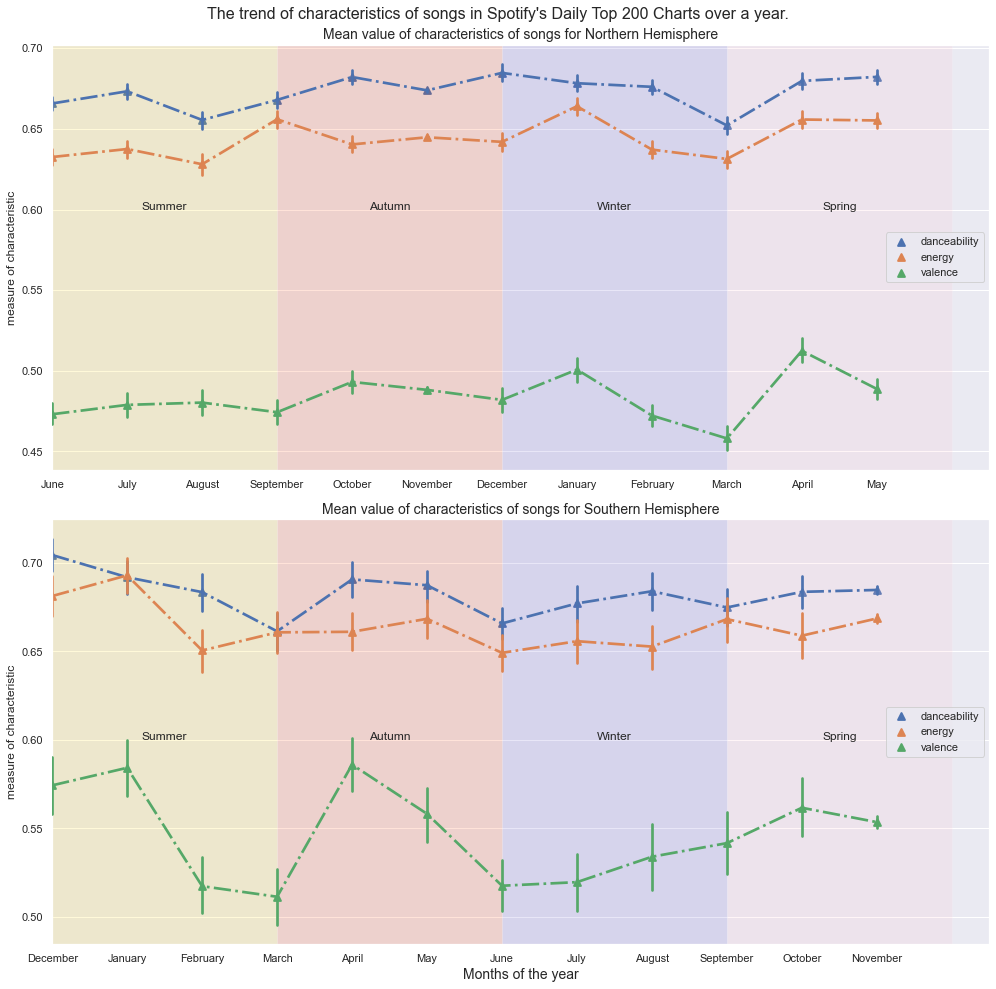

In [ ]:
#Produce a time interval in number of days  from 'Days_since_release' and add to 'Release_date'. 
df_continent['Chart_date'] = df_continent.Release_date + pd.to_timedelta(df_continent.Days_since_release.values, unit='d')
df_continent['Month'] = df_continent.Chart_date.dt.month 
df_continent['Month_name'] = df_continent.Chart_date.dt.month_name()

#list of month names
months = df_continent[['Month','Month_name']].sort_values('Month').drop('Month', axis = 1)['Month_name'].unique().tolist()

# defining the continents in respective hemispheres
hemispheres = {"Northern Hemisphere":["Europe","North America"],
              "Southern Hemisphere":["Oceania","South America"]
              }
# defining the sorting orders for Month_name based on seasons in order of Summer, Autumn, Winter and Spring.
sort_orders = {"Northern Hemisphere":months[5:12]+months[0:5],
              "Southern Hemisphere":months[:10:-1]+months[0:11]
              }
# defining seasons and characteristic colours
season_colours = {"Summer": "gold",
               "Autumn": "orangered",
               "Winter": "slateblue",
               "Spring": "pink"}

# The three music characteristics that may  exhibit the greatest trend and timeseries correlation.
numerical_columns2 = ['danceability','energy', 'valence']

#setup a figure and subplots.
fig,ax = plt.subplots(2,1,figsize=(14,14))
fig.suptitle("The trend of characteristics of songs in Spotify's Daily Top 200 Charts over a year.", fontsize = 16)

for count1, hemisphere in enumerate(hemispheres):
# Filter for continents in Northern Hemisphere and Southern Hemisphere
    df_seasons = df_continent[(df_continent.Continent == hemispheres[hemisphere][0]) |
                              (df_continent.Continent == hemispheres[hemisphere][1])].copy()

    df_seasons = df_seasons[["Month_name"]+numerical_columns2]
    df_seasons.Month_name = pd.Categorical(df_seasons.Month_name, categories = sort_orders[hemisphere], ordered = True)
#Converts the wide form of the dataframe to the preferred long form as this is more intuitive for seaborn to interpret and
#and produce graph.
    df_seasons = pd.melt(df_seasons,id_vars=["Month_name"],var_name='attributes', value_name='values')
#A seaborn Point plot gives the mean of the data with error bars showing the 95% confidence Interval of the sample mean.  
    sns.pointplot(x = 'Month_name',
                  y = 'values',
                  hue = 'attributes',
                  data = df_seasons,
                  estimator=np.mean,
                  linestyles = '-.',
                  markers = '^',
                  ax=ax[count1]
                  )
    ax[count1].set_title(f'Mean value of characteristics of songs for {hemisphere}', fontsize = 14)
    if hemisphere == "Northern Hemisphere":
        ax[count1].set_xlabel("")
    else:
        ax[count1].set_xlabel("Months of the year", fontsize = 14)
    ax[count1].set_ylabel("measure of characteristic")
    ax[count1].legend(loc='center right')
    ax[count1].set_xlim(0, 12.5) 
#Annotations of name of seasons  and  background colour  
    for count2,(key, value) in enumerate(season_colours.items()):
        ax[count1].annotate(key, xy = (3*count2+1.5,0.60),horizontalalignment='center')
        ax[count1].axvspan(3*count2, 3*(count2+1), facecolor = value, alpha=0.15)
    
plt.tight_layout()

The graphs show little variation in the song characteristics of *danceability* and *energy* due to seasonal affects for both Hemispheres. These two characteristics in songs on average remain relatively consistent over the course of 12 month period. This suggests that perhaps the *danceability* and *energy* of songs listed in Spotify's Daily Top 200 charts are not depended on seasonal variations, and this is true regardless of countries on either part of the globe. However, a greater variation in the song characteristic of *valence* is observed through the 12 month cycle, being more apparent for countries in the Southern Hemisphere. For these particular countries, the *valence* characteristic, that is the extent of positivity conveyed by the song, appears to be lower during the winter period of June, July and August, and increases as the year progresses towards the warmer season.This trend is also apparent for the selection of countries in the Northern Hemisphere but to a lesser extent.

## How has music changed over the years?

How have the characteristics of music changed over the years? Many different types of music is listened to on Spotify, including older songs released decades ago. How have the characteristics of these songs evolved over time? In particular, the characteristics of focus are the duration of tracks, *duration_ms*, *Tempo* and *Loudness*. As the three quantities are of different sized values, they are rescaled to standardized scores using the *prerocessing.StandardScaler()* function from *sklearn* library in order to observe their trends over time on the same comparable scale. A timeseries line plot is produced to examine the trend of the three quantities over time using the year attribute of the *Release_date* as the timestamp. The data is filtered for years greater than the year 1950 to ensure  that there are sufficient observations for Seaborn *lineplot()* to aggregate the repeated values in each year.

In [ ]:
#using the df_song dataframe, that has been filtered by unique song identifier, to select the song characteristics
#in question.
df_trend = df_song[['Release_date','duration_ms','tempo','loudness']].copy()
#extract the year from the Release_date column, converts to Int64 data type
df_trend['year'] =df_trend.Release_date.dt.year
#sort by year
df_trend = df_trend.sort_values(by = 'year')
df_trend = df_trend[['year','duration_ms','tempo','loudness']]
#
df_trend['year'] = pd.to_datetime(df_trend['year'], format = '%Y')
#The mean values of each characteristic grouped by year
df_trend_mean = df_trend.groupby("year")[['duration_ms','tempo','loudness']].mean()
#The numerical values are rescaled.
scaler = StandardScaler()
df_trend[['duration_ms','tempo','loudness']] = scaler.fit_transform(df_trend[['duration_ms','tempo','loudness']])
#Converts the wide form of the dataframe to the preferred long form as this is more intuitive for Seaborn to interpret
#and produce graph.
df_trend_long = pd.melt(df_trend,id_vars=['year'],var_name='characteristics', value_name='values')
df_trend_long.head(5)

,year,characteristics,values
0,1900-01-01,duration_ms,-1.473407
1,1929-01-01,duration_ms,-0.171480
2,1939-01-01,duration_ms,-0.021120
3,1942-01-01,duration_ms,-0.952751
4,1942-01-01,duration_ms,-0.516824


(-4.0, 3.0)

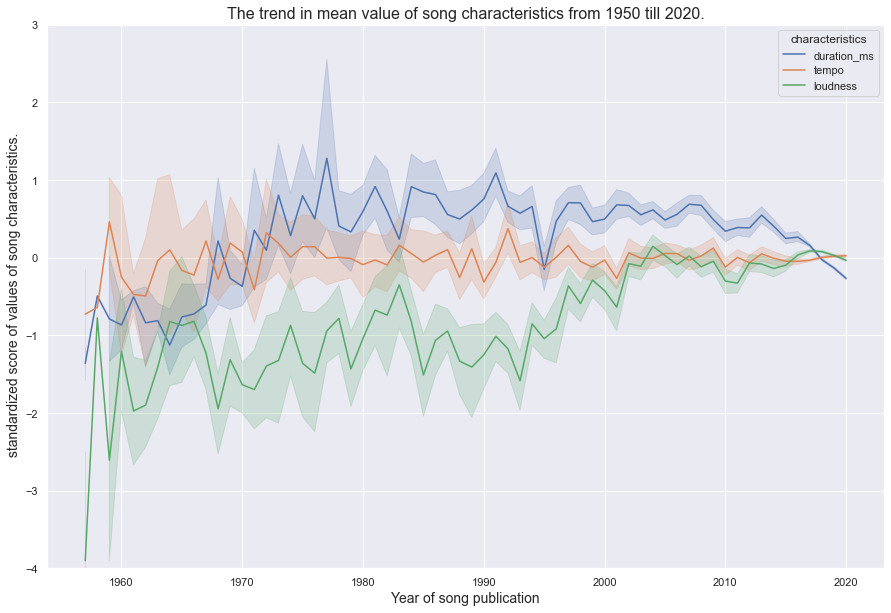

In [ ]:
plt.figure(figsize = (15,10))
#filter dataframe from years greater than 1950
df_trend_long_filtered = df_trend_long[df_trend_long.year > pd.Timestamp(1950,1,1)]
plot5 = sns.lineplot(data =df_trend_long_filtered, x = 'year', y = 'values', hue = 'characteristics' )
plot5.set_title("The trend in mean value of song characteristics from 1950 till 2020.", fontsize = 16)
plot5.set_xlabel("Year of song publication", fontsize = 14)
plot5.set_ylabel(" standardized score of values of song characteristics.", fontsize = 14)
plot5.set_ylim(-4, 3)


The graph demonstrates the trend in the mean value and 95% confidence intervals for the song characeristics over time. It can be seen that the mean *loudness* of songs had increased to a peak around the early 1980s, then decreased and remained relatively stable for the next decade. The mean *loudness* of songs then gradually increaded by order of a whole standard deviation up to the mid 2000s and has remained relatively consistent till present time. In contrast, the mean *Tempo* of songs has remains relatively stable over the course of the last 80 years. This trend is similar for the mean song *duration_ms*. The mean song *duration_ms* peaked in the late 1970s and fell to a minimum in the mid 1990s, but the long term trend in mean *duration_ms* remained relatively consistent up to the mid 2010s. In more recent times, the mean *duration_ms* seems to be on a decreasing trend.